# Classifying movie reviews: Binary Classification, using mse as loss function and tanh as activation function

In [1]:
from keras.datasets import imdb
from keras.models import Model
from keras.layers import Dense, Input
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


### Encoding the integer sequences into a binary matrix

In [2]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Model definition

In [3]:
epochs = 9
batch_size = 512
hidden_units = 16
input_shape = (10000,)

inputs = Input(shape=input_shape)
y = Dense(hidden_units,activation='tanh')(inputs)
y = Dense(hidden_units,activation='tanh')(y)

outputs = Dense(1,activation='sigmoid')(y)

model = Model(inputs,outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Setting aside a validation set

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Compiling and training the model

In [5]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1,len(acc)+1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/9
15000/15000 [==============================] - 1s 78us/step - loss: 0.1604 - acc: 0.7991 - val_loss: 0.1098 - val_acc: 0.8778
Epoch 2/9
15000/15000 [==============================] - 1s 62us/step - loss: 0.0813 - acc: 0.9121 - val_loss: 0.0873 - val_acc: 0.8883
Epoch 3/9
15000/15000 [==============================] - 1s 64us/step - loss: 0.0556 - acc: 0.9373 - val_loss: 0.0830 - val_acc: 0.8877
Epoch 4/9
15000/15000 [==============================] - 1s 64us/step - loss: 0.0401 - acc: 0.9551 - val_loss: 0.0848 - val_acc: 0.8847
Epoch 5/9
15000/15000 [==============================] - 1s 64us/step - loss: 0.0321 - acc: 0.9629 - val_loss: 0.0884 - val_acc: 0.8797
Epoch 6/9
15000/15000 [==============================] - 1s 62us/step - loss: 0.0245 - acc: 0.9728 - val_loss: 0.0930 - val_acc: 0.8778
Epoch 7/9
15000/15000 [==============================] - 1s 65us/step - loss: 0.0193 - acc: 0.9794 - val_loss: 0.1048 - val_acc: 0.868

### Plotting the training and validation loss

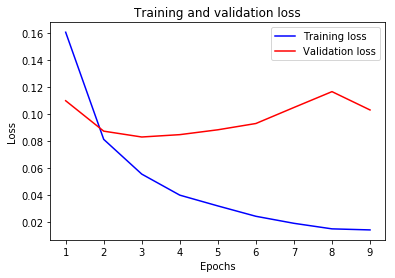

In [6]:
plt.plot(epochs,loss_values,'b',label='Training loss')
plt.plot(epochs,val_loss_values,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

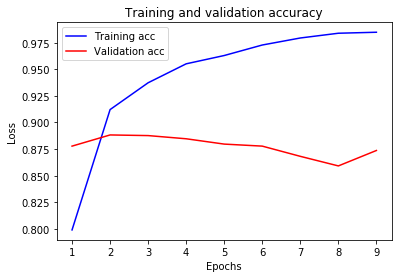

25000/25000 [==============================] - 1s 59us/step

Score :86.3%


In [7]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

score = model.evaluate(x_test,y_test)
print("\nScore :%.1f%%" % (100.0*score[1]))